<a href="https://colab.research.google.com/github/nicolasViniegraa/porfolio/blob/main/deep_learning/CNN/Handwritten_Digits%26Operators_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download michelheusser/handwritten-digits-and-operators

mkdir: cannot create directory ‘/root/.kaggle’: File exists
handwritten-digits-and-operators.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip handwritten-digits-and-operators

Streaming output truncated to the last 5000 lines.
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_2y1.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_2y1_2.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_2y1_3.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_3y1.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_3y1_2.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1_3y1_3.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1y1_2.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_111_scaled_x1y1_3.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_112.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_112_scaled_x1_2y1.png  
  inflating: CompleteImages/All data (Compressed)/]/]_3_15ccw_112_scaled_x1_2y1_2.png  
  infla

In [23]:
import tensorflow as tf
import numpy as np
import pathlib
import PIL
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
data_dir = "/content/CompleteImages/All data (Compressed)"
data_dir = pathlib.Path(data_dir)

In [8]:
image_count = len(list(data_dir.glob('*/*.png')))
print("Amount of images", image_count)

Amount of images 333895


In [9]:
plus = list(data_dir.glob('5/*'))
Image.open(str(plus[0]))

In [10]:
batch_size = 32
img_height = 28
img_width = 28

In [11]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  color_mode='grayscale',
  batch_size=batch_size)

Found 333895 files belonging to 16 classes.
Using 267116 files for training.


In [12]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  color_mode='grayscale',
  batch_size=batch_size)

Found 333895 files belonging to 16 classes.
Using 66779 files for validation.


In [13]:
class_names = val_ds.class_names
num_classes = len(class_names)
print(class_names)

['%', '*', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '[', ']']


In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 1)
(32,)


In [18]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  keras.Input(shape=(28, 28, 1)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8348/8348 [==============================] - 215s 25ms/step - loss: 0.2288 - accuracy: 0.9265 - val_loss: 0.0963 - val_accuracy: 0.9685
Epoch 2/10
8348/8348 [==============================] - 191s 23ms/step - loss: 0.0964 - accuracy: 0.9680 - val_loss: 0.0714 - val_accuracy: 0.9762
Epoch 3/10
8348/8348 [==============================] - 193s 23ms/step - loss: 0.0770 - accuracy: 0.9740 - val_loss: 0.0586 - val_accuracy: 0.9797
Epoch 4/10
8348/8348 [==============================] - 190s 23ms/step - loss: 0.0658 - accuracy: 0.9772 - val_loss: 0.0575 - val_accuracy: 0.9807
Epoch 5/10
8348/8348 [==============================] - 190s 23ms/step - loss: 0.0596 - accuracy: 0.9792 - val_loss: 0.0551 - val_accuracy: 0.9807
Epoch 6/10
8348/8348 [==============================] - 192s 23ms/step - loss: 0.0558 - accuracy: 0.9803 - val_loss: 0.0474 - val_accuracy: 0.9837
Epoch 7/10
8348/8348 [==============================] - 190s 23ms/step - loss: 0.0527 - accuracy: 0.9814 - val_loss: 0

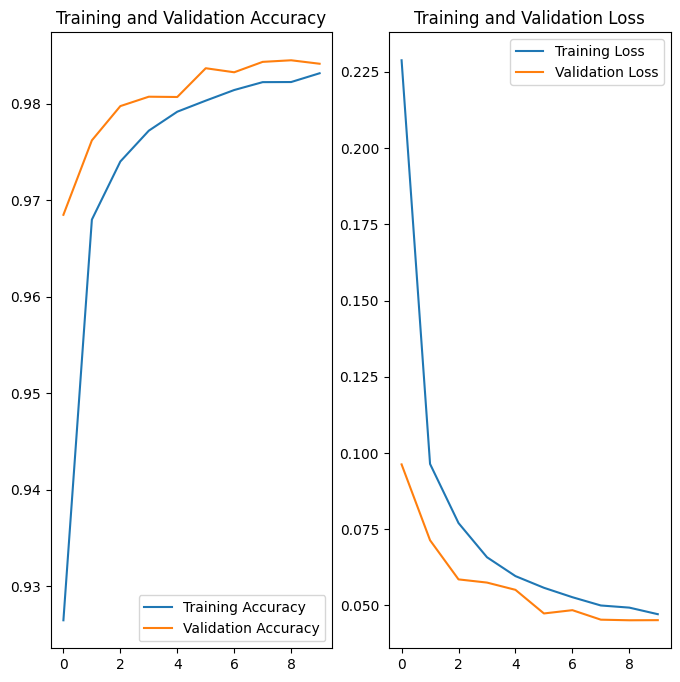

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
def predict_image(img):
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))

In [36]:
predict_image(PIL.Image.open(r'/content/1_1_8ccw_10_scaled_x1_3y1.png'))

1/1 [==============================] - 0s 89ms/step
This image most likely belongs to 1 with a 99.68 percent confidence.
